<a href="https://colab.research.google.com/github/Polt3r/AprendizagemMaquina/blob/main/Atividade_ML_Enzo_Tavares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando Bibliotecas

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Importando Tabela


In [ ]:
df = pd.read_excel('Planilha100.xlsx')

In [ ]:
df

,X1,X2,X3,X4,X5
0,104,452,584,578,882
1,972,750,182,936,563
2,525,40,263,286,381
3,740,33,929,444,539
4,814,415,734,925,808
...,...,...,...,...,...
94,112,543,7,695,362
95,232,421,586,535,2
96,946,208,709,448,678
97,646,297,971,414,369


In [ ]:
df.describe()

,X1,X2,X3,X4,X5
count,99.000000,99.000000,99.000000,99.000000,99.000000
mean,398.717172,385.383838,517.232323,534.484848,536.323232
std,311.022312,240.021075,270.271324,296.735000,235.494609
min,0.000000,0.000000,7.000000,8.000000,0.000000
25%,90.000000,155.000000,263.000000,286.000000,334.000000
50%,445.000000,415.000000,556.000000,535.000000,563.000000
75%,525.000000,607.000000,709.000000,697.000000,681.000000
max,972.000000,793.000000,971.000000,998.000000,882.000000


##Heatmap

<Axes: >

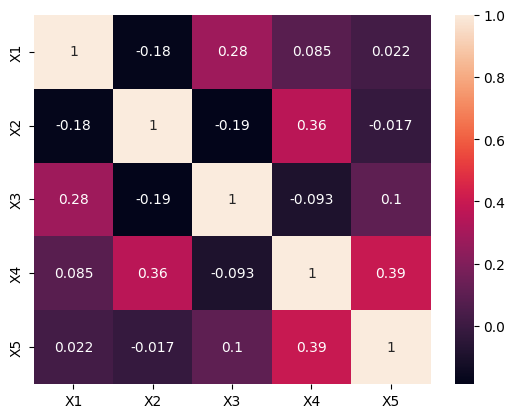

In [ ]:
sns.heatmap(df.corr(), annot = True)

##Boxplot

<Axes: >

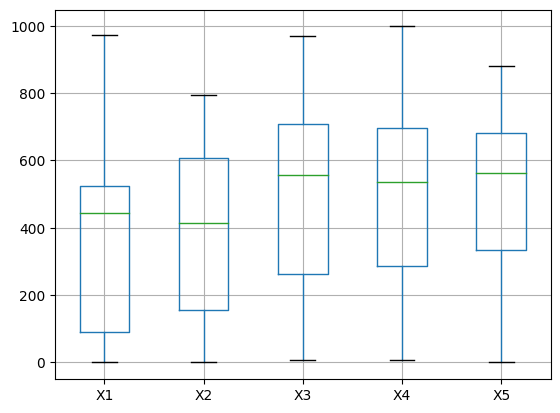

In [ ]:
df.boxplot()

##Pairplot

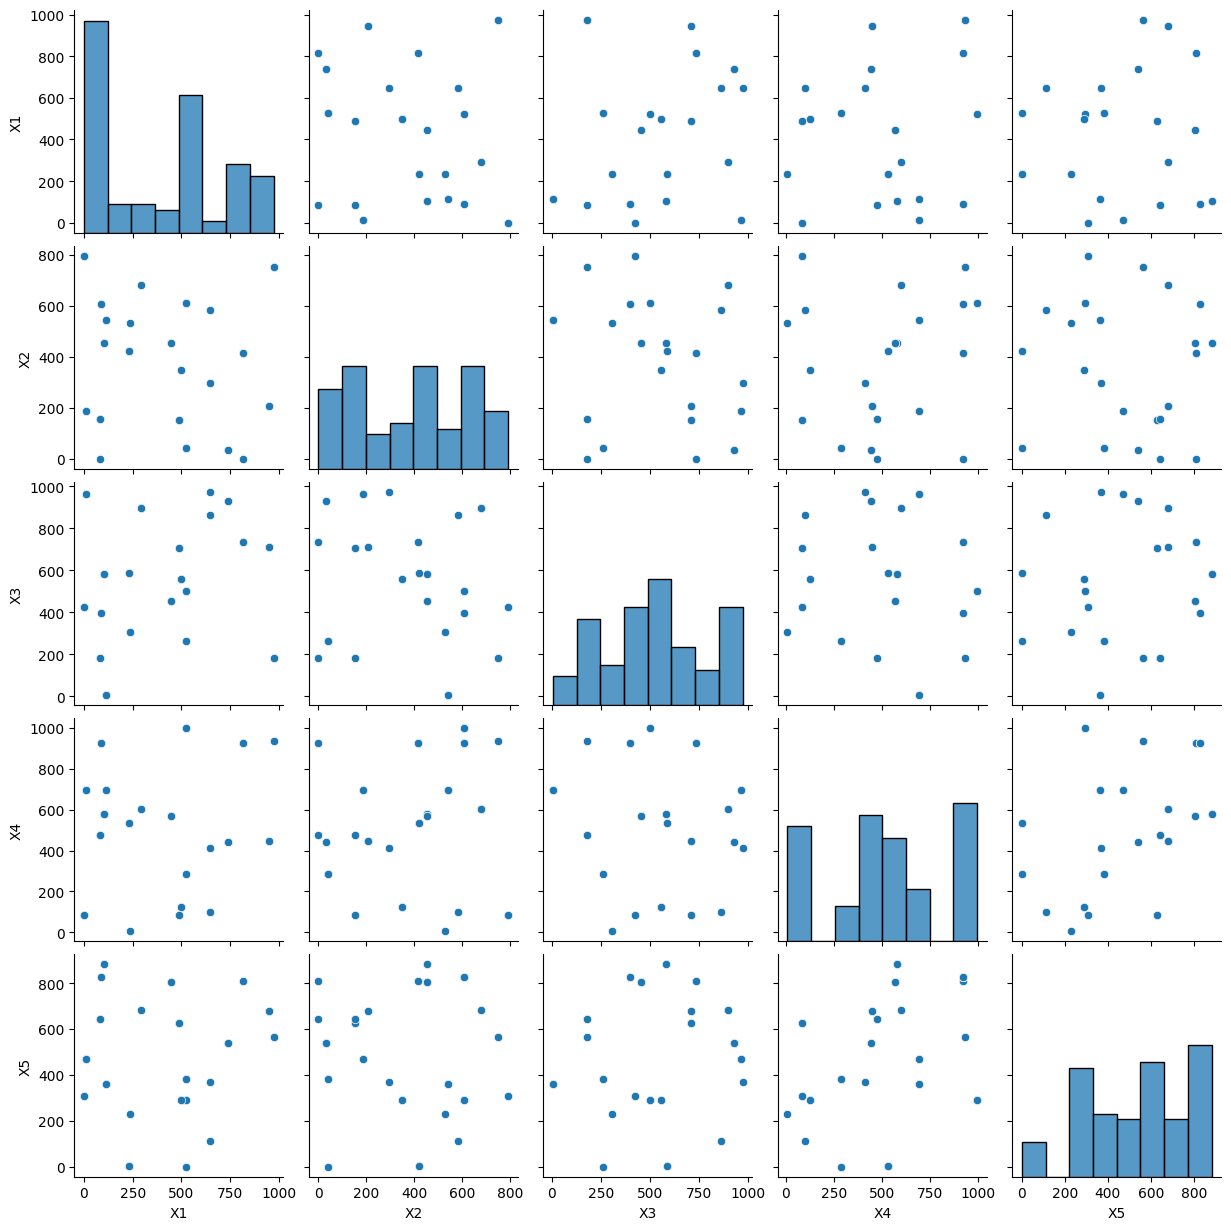

In [ ]:
sns.pairplot(df)

##Removendo espaços

In [ ]:
columns_names = list(df)
columns_names

['X1', 'X2', 'X3', 'X4', 'X5']

In [ ]:
for names in columns_names[1:]:
  for x in [names]:
    q75,q25 = np.percentile(df.loc[:,x], [75, 25])
    intr_qr = q75-q25

    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)

    df.loc[df[x] < min, x] = np.nan
    df.loc[df[x] > max, x] = np.nan

In [ ]:
df.isnull().sum()

,0
X1,0
X2,0
X3,0
X4,0
X5,0


##Fazendo a normalização

In [ ]:
min_valor = df.min()
max_valor = df.max()
max_valor

,0
X1,972
X2,793
X3,971
X4,998
X5,882


In [ ]:
min_valor

,0
X1,0
X2,0
X3,7
X4,8
X5,0


In [ ]:
x_Normalization = (df.iloc[2,1] - min_valor[1] / max_valor[1] )
x_Normalization

<ipython-input-34-0b760e12815a>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_Normalization = (df.iloc[2,1] - min_valor[1] / max_valor[1] )


40.0

##Padronização

In [ ]:
x_Standarization = (df.iloc[0,0] - min_valor[0]) / (max_valor[0] - min_valor[0])
x_Standarization

<ipython-input-35-522e91fe829e>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_Standarization = (df.iloc[0,0] - min_valor[0]) / (max_valor[0] - min_valor[0])


0.10699588477366255

#Usando Sklearn

##Padronização

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df)

StandardScaler()

In [ ]:
scaler.transform(df)

array([[-9.52397957e-01,  2.78955410e-01,  2.48296648e-01,
         1.47392805e-01,  1.47534566e+00],
       [ 1.85260123e+00,  1.52683145e+00, -1.24666704e+00,
         1.35999629e+00,  1.13856229e-01],
       [ 4.08091280e-01, -1.44629603e+00, -9.45443014e-01,
        -8.41658080e-01, -6.62918303e-01],
       [ 1.10287794e+00, -1.47560856e+00,  1.53128787e+00,
        -3.06486710e-01,  1.14244229e-02],
       [ 1.34201382e+00,  1.24017780e-01,  8.06118919e-01,
         1.32273752e+00,  1.15951425e+00],
       [-1.01702927e+00, -9.64733129e-01, -1.25038586e+00,
        -2.04871893e-01,  4.51027592e-01],
       [ 1.49566009e-01,  2.87330417e-01, -2.35149321e-01,
         1.16908360e-01,  1.13817429e+00],
       [-9.97639880e-01,  9.28018452e-01, -4.43402969e-01,
         1.31935036e+00,  1.23633811e+00],
       [ 3.20839001e-01, -1.52357451e-01,  1.44169824e-01,
        -1.39037809e+00, -1.05557356e+00],
       [-9.52397957e-01,  2.78955410e-01,  2.48296648e-01,
         1.47392805e-01

In [ ]:
transformed_data = scaler.transform(df)
scaler_df = pd.DataFrame(data = transformed_data, columns=df.columns)
print(scaler_df)

          X1        X2        X3        X4        X5
0  -0.952398  0.278955  0.248297  0.147393  1.475346
1   1.852601  1.526831 -1.246667  1.359996  0.113856
2   0.408091 -1.446296 -0.945443 -0.841658 -0.662918
3   1.102878 -1.475609  1.531288 -0.306487  0.011424
4   1.342014  0.124018  0.806119  1.322738  1.159514
..       ...       ...       ...       ...       ...
94 -0.926545  0.660018 -1.897460  0.543691 -0.744010
95 -0.538758  0.149143  0.255734  0.001745 -2.280487
96  1.768581 -0.742795  0.713149 -0.292938  0.604675
97  0.799111 -0.370108  1.687478 -0.408102 -0.714134
98 -0.926545  0.660018 -1.897460  0.543691 -0.744010

[99 rows x 5 columns]


<Axes: ylabel='Density'>

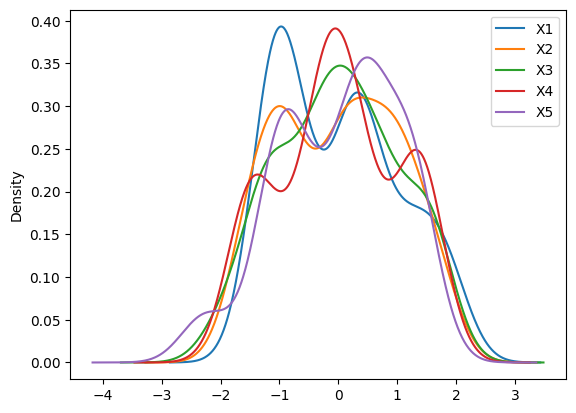

In [ ]:
scaler_df.plot.kde()